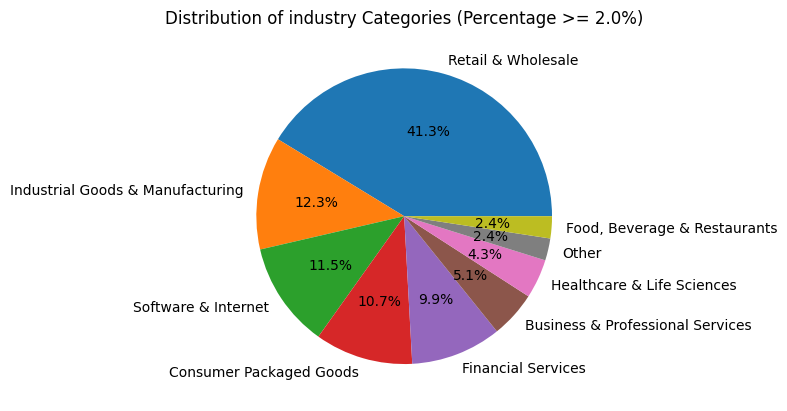

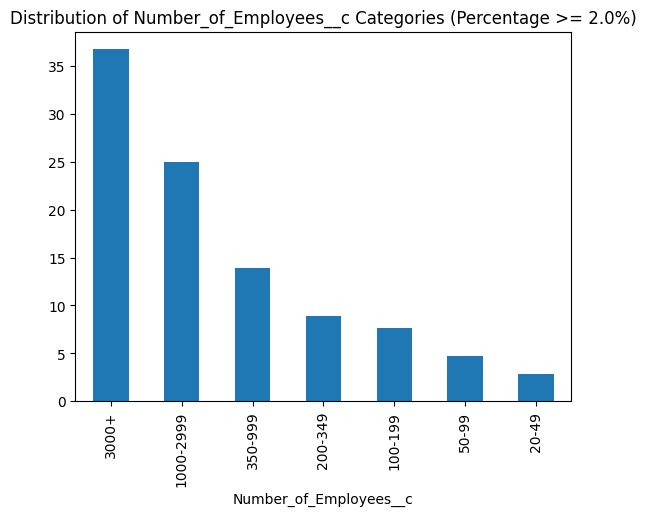

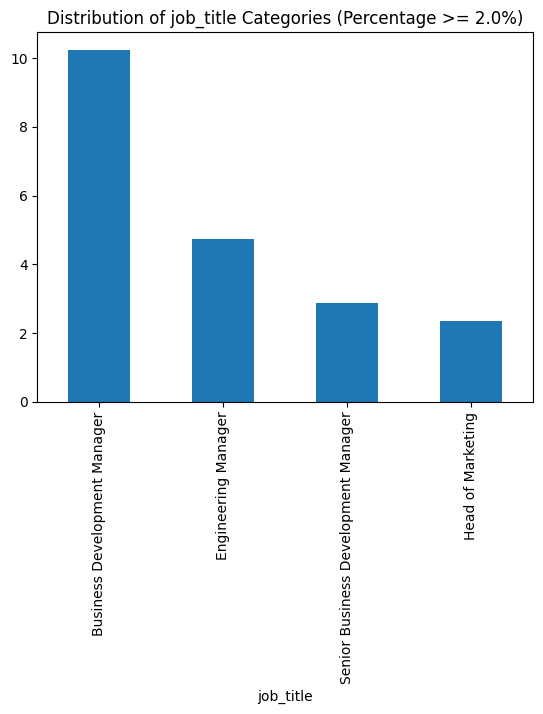

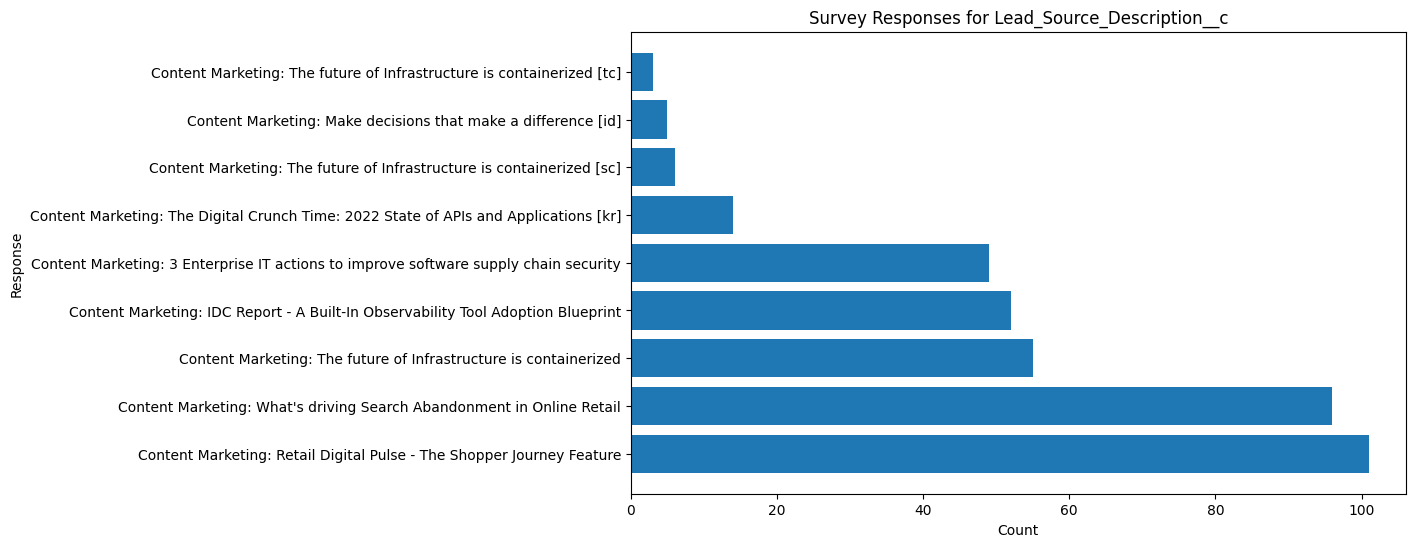

The most repeated event type is 'launches' with 620 occurrences.
           Event Type  Count
3            launches    620
1               hires    171
2            acquires     84
0       partners_with     58
4         Goes Public      7
5  expands_offices_to      3


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

def create_categorical_visualization(df, column_name, threshold, chart_type='pie'):
    """
    Create a categorical visualization for a specific column in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to visualize.
        threshold (float): The minimum percentage for a category to be included.
        chart_type (str): The type of chart to create ('pie' or 'bar').

    Returns:
        None
    """
    category_counts = df[column_name].value_counts()
    total_count = len(df)
    category_percentages = (category_counts / total_count) * 100

    # Filter categories with a percentage greater than or equal to the threshold
    filtered_categories = category_percentages[category_percentages >= threshold]

    if chart_type == 'pie':
        # Create a pie chart for the filtered categories
        labels = filtered_categories.index
        sizes = filtered_categories.values

        plt.pie(sizes, labels=labels, autopct='%1.1f%%')
        plt.title(f'Distribution of {column_name} Categories (Percentage >= {threshold}%)')
    elif chart_type == 'bar':
        # Create a bar chart for the filtered categories
        filtered_categories.plot(kind='bar')
        plt.title(f'Distribution of {column_name} Categories (Percentage >= {threshold}%)')

    plt.show()

def analyze_survey_responses(df, column_name):
    response_counts = df[column_name].value_counts().reset_index()
    response_counts.columns = ['Response', 'Count']

    # Create a bar chart for survey responses
    plt.figure(figsize=(10, 6))
    plt.barh(response_counts['Response'], response_counts['Count'])
    plt.xlabel('Count')
    plt.ylabel('Response')
    plt.title(f'Survey Responses for {column_name}')

    plt.show()

# Read the CSV file
df = pd.read_csv('google.csv')

# Specify the columns and chart types you want to visualize
columns_to_visualize = {
    'industry': 'pie',
    'Number_of_Employees__c': 'bar',
    'job_title': 'bar',
    # Add more columns as needed
}

# Define the threshold for including categories
threshold = 2.0

# Create visualizations for each specified column
for column_name, chart_type in columns_to_visualize.items():
    create_categorical_visualization(df, column_name, threshold, chart_type)

# Analyze and display survey responses for a specific column (e.g., 'survey_column_name')
survey_column_name = 'Lead_Source_Description__c'
analyze_survey_responses(df, survey_column_name)


import pandas as pd
import re
from collections import Counter

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('google.csv')  # Replace 'your_file.csv' with your file path

# Combine all event descriptions into a single text
all_events_text = ' '.join(df['Discover - Events'].astype(str))

# Define event types to search for
event_types = ['partners_with', 'hires', 'acquires', 'launches', 'Goes Public', 'expands_offices_to']  # Add all event types you're interested in

# Initialize a counter for event type occurrences
event_type_counter = Counter()

# Use regular expressions to count occurrences of event types
for event_type in event_types:
    event_type_counter[event_type] = len(re.findall(f'(?i){event_type}', all_events_text))

# Find the most repeated event type
most_common_event_type, most_common_event_count = event_type_counter.most_common(1)[0]

# Create a data table (DataFrame) to represent the information
event_type_data = {'Event Type': list(event_type_counter.keys()), 'Count': list(event_type_counter.values())}
event_type_df = pd.DataFrame(event_type_data)

# Sort the DataFrame by count in descending order
event_type_df = event_type_df.sort_values(by='Count', ascending=False)

print(f"The most repeated event type is '{most_common_event_type}' with {most_common_event_count} occurrences.")

# Display the data table
print(event_type_df)

from IPython.display import HTML, display

# Your code for calculating and formatting the suggested revenue range
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('google.csv')  # Replace with your file path

# Specify the column containing revenue data
revenue_column = 'Discover - Revenue'

# Calculate the median of the revenue data
median_revenue = df[revenue_column].median()

# Define a suggested revenue range based on the median
lower_bound = int(median_revenue * 0.5)
upper_bound = int(median_revenue * 2.5)

# Format the range for presentation
suggested_range = f"${lower_bound:,.0f} to ${upper_bound:,.0f}"

# Use HTML to create a white box around the output with custom styling for black and bold text
output_html = f'<div style="background-color: white; padding: 5px; display: inline-block; border: 1px solid #ccc; font-weight: bold; color: black;">The suggested revenue is in the range of {suggested_range}</div>'
display(HTML(output_html))
